In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
1160,6242-MBHPK,Female,1,Yes,No,23,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.10,2326.05,No
5937,5383-MMTWC,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.00,613.4,Yes
3543,0853-TWRVK,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),105.60,7581.5,No
2537,8670-ERCJH,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),113.40,8164.1,No


In [9]:
df.drop('customerID', axis='columns', inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.dtypespes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [14]:
pd.to_numeric(df.TotalCharges, errors='coerce')  # errors='coerce' means the to_numeric function will ignore the errors and change the other values to numeric.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [15]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull() # isnull will tell you of the row is null or not.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [16]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [18]:
df.shape

(7043, 20)

In [20]:
df.iloc[488] # Similar to Array Indexing

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [21]:
df.iloc[488]['TotalCharges']

' '

In [22]:
df.iloc[488]['PaperlessBilling']

'Yes'

In [23]:
dfNew=df[df['TotalCharges']!=' ']
dfNew.shape

(7032, 20)

In [24]:
dfNew.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [27]:
dfNew['TotalCharges']=pd.to_numeric(dfNew['TotalCharges'])

<ipython-input-27-8d7d4ed7835d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['TotalCharges']=pd.to_numeric(dfNew['TotalCharges'])


In [29]:
dfNew['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [30]:
dfNew.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [31]:
dfNew[dfNew['Churn'] == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [32]:
dfNew[dfNew['Churn'] == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

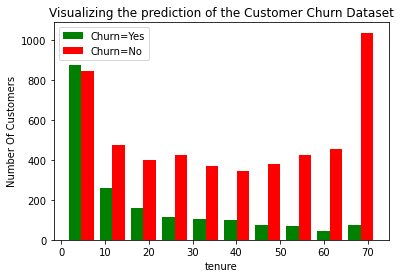

In [37]:
tenure_churn_no=dfNew[dfNew['Churn']== 'No'].tenure
tenure_churn_yes=dfNew[dfNew['Churn']== 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number Of Customers')
plt.title('Visualizing the prediction of the Customer Churn Dataset')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [39]:
for column in df:
    print(f'{column} : {df[column].unique()} ')

gender : ['Female' 'Male'] 
SeniorCitizen : [0 1] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges : [29.85 56.95 53.

In [40]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
             print(f'{column} : {df[column].unique()} ')

In [41]:
print_unique_col_values(dfNew)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [42]:
dfNew.replace('No phone service', 'No', inplace=True)
dfNew.replace('No internet service', 'No', inplace=True)

C:\Users\argha\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [43]:
print_unique_col_values(dfNew)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes'] 
OnlineBackup : ['Yes' 'No'] 
DeviceProtection : ['No' 'Yes'] 
TechSupport : ['No' 'Yes'] 
StreamingTV : ['No' 'Yes'] 
StreamingMovies : ['No' 'Yes'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [47]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    dfNew[col].replace({'Yes': 1,'No': 0},inplace=True) #We can pass a dictionary to the 'replace' function as well.

C:\Users\argha\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [48]:
for col in dfNew:
    print(f'{col} : {dfNew[col].uniqueue()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [49]:
 dfNew['gender'].replace({'Female': 1,'Male': 0},inplace=True)

C:\Users\argha\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [51]:
dfNew['gender'].unique()

array([1, 0], dtype=int64)

In [52]:
dfNew2=pd.get_dummies(data=dfNew, columns=['InternetService','Contract','PaymentMethod'])
dfNew2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [53]:
dfNew2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [54]:
dfNew2.shape

(7032, 27)

In [55]:
dfNew2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [57]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

dfNew2[cols_to_scale]=scaler.fit_transform(dfNew2[cols_to_scale])

In [58]:
dfNew2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [59]:
for col in dfNew2:
    print(f'{col} : {dfNew2[col].unique()}')
    

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [60]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [61]:
X.shape

(7032, 26)

In [62]:
y.shape

(7032,)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [67]:
X_train.shape

(4922, 26)

In [68]:
y_train.shape

(4922,)

In [69]:
len(X_train.columns)

26

In [72]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
154/154 [==============================] - 4s 14ms/step - loss: 0.5149 - accuracy: 0.7363
Epoch 2/50
154/154 [==============================] - 2s 13ms/step - loss: 0.4292 - accuracy: 0.7976
Epoch 3/50
154/154 [==============================] - 2s 12ms/step - loss: 0.4197 - accuracy: 0.7999
Epoch 4/50
154/154 [==============================] - 2s 12ms/step - loss: 0.4146 - accuracy: 0.8052
Epoch 5/50
154/154 [==============================] - 2s 12ms/step - loss: 0.4120 - accuracy: 0.8037
Epoch 6/50
154/154 [==============================] - 2s 12ms/step - loss: 0.4084 - accuracy: 0.8058
Epoch 7/50
154/154 [==============================] - 2s 13ms/step - loss: 0.4080 - accuracy: 0.8080
Epoch 8/50
154/154 [==============================] - 2s 12ms/step - loss: 0.4050 - accuracy: 0.8060
Epoch 9/50
154/154 [==============================] - 2s 12ms/step - loss: 0.4040 - accuracy: 0.8113
Epoch 10/50
154/154 [==============================] - 2s 12ms/step - loss: 0.4012 - accura

In [89]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 5ms/step - loss: 0.4633 - accuracy: 0.7768


[0.4633116126060486, 0.7767772674560547]

In [90]:
yp=model.predict(X_test)

In [91]:
yp[:5][0]

array([0.29616767], dtype=float32)

In [92]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
1042    0
3913    0
3397    0
3292    0
4605    0
Name: Churn, Length: 2110, dtype: int64

In [94]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [95]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [97]:
yp[:5]

array([[0.29616767],
       [0.38471717],
       [0.0154538 ],
       [0.803217  ],
       [0.5874764 ]], dtype=float32)

In [98]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [99]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1511
           1       0.63      0.51      0.56       599

    accuracy                           0.78      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110



Text(69.0, 0.5, 'Truth')

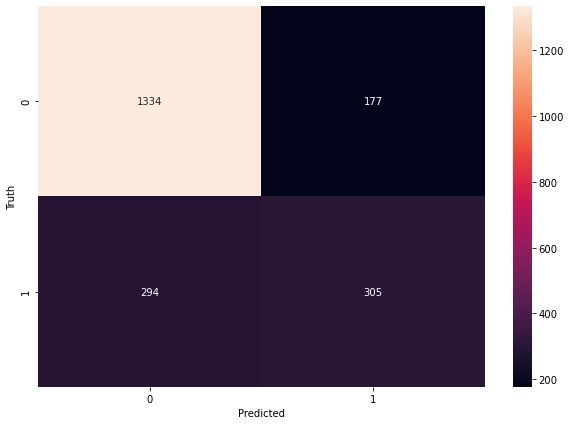

In [100]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Accuracy

In [102]:
round((1334+305)/(1334+177+294+305),2)

0.78

## Precision For 0 class i.e Precision for customers who did not churn

In [103]:
round(1334/(1334+294),2)

0.82

## Precision For 1 class i.e Precision for customers who actually churned

In [104]:
round(305/(305+177),2)

0.63

## Recall for 0 class. Recall is your total Truth

In [105]:
 round(1334/(1334+177),2)

0.88

In [106]:
round(305/(305+177),2)

0.63